In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\FGD_02F-EVAL BOARD'
#CSV_corrected_path = CSV_path + '\corrected'
print(CSV_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-24_03
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\FGD_02F-EVAL BOARD


In [3]:
file ='CSV_FGD_02F_1276.csv'
file_comp ='CSV_FGD_02F_1276_COMPENSATED.csv'
print(file)
print(file_comp)

df = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\FGD_02F-EVAL BOARD'+ '\\'+ file ,engine='python')
df_comp = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\FGD_02F-EVAL BOARD'+ '\\'+ file_comp ,engine='python')

CSV_FGD_02F_1276.csv
CSV_FGD_02F_1276_COMPENSATED.csv


In [4]:
eval_brd = df.to_numpy()
eval_brd_comp = df_comp.to_numpy()
df.head()

,0x0B,0x0C,0x0D,0x0E,0x0F,TARG,THRES,TEMP,FSENS,FREF,...,FSENS.1,FREF.1,RCHEV.1,RCHCNT.1,SN.1,SOCKET.1,TGATE,FCK,PROC,Unnamed: 31
0,66,121,1,51,256,49,29,107,47824,47688,...,42440,41912,0,0,1277,253,250,32.768,6,Thu Mar 24 18:46:55 20221648144015
1,66,121,1,51,256,49,29,107,47828,47696,...,42436,41908,0,0,1277,253,250,32.768,6,Thu Mar 24 18:46:56 20221648144016
2,66,121,1,51,256,49,29,107,47828,47696,...,42436,41904,0,0,1277,253,250,32.768,6,Thu Mar 24 18:46:57 20221648144017
3,66,121,1,51,256,49,29,107,47824,47688,...,42428,41908,0,0,1277,253,250,32.768,6,Thu Mar 24 18:46:57 20221648144017
4,66,121,1,51,256,49,29,107,47824,47688,...,42436,41904,0,0,1277,253,250,32.768,6,Thu Mar 24 18:46:58 20221648144018


In [5]:
df_comp.head()

,TEMP,RADS,RADS_AVG,RADS_OFFSET,HZ/RAD,SN,TEMP.1,RADS.1,RADS_AVG.1,RADS_OFFSET.1,HZ/RAD.1,SN.1,S0_S1_AVG,Unnamed: 13
0,19,0.208643,0.201087,-0.062483,519.266,1276,19,0.221812,0.234223,-0.163642,510.333,1277,0.217655,Thu Mar 24 18:46:55 20221648144015
1,19,0.224358,0.201543,-0.062483,519.266,1276,19,0.216996,0.233885,-0.163642,510.333,1277,0.217714,Thu Mar 24 18:46:56 20221648144016
2,19,0.224358,0.201991,-0.062483,519.266,1276,19,0.204337,0.233306,-0.163642,510.333,1277,0.217648,Thu Mar 24 18:46:57 20221648144017
3,19,0.208643,0.202121,-0.062483,519.266,1276,19,0.232682,0.233293,-0.163642,510.333,1277,0.217707,Thu Mar 24 18:46:57 20221648144017
4,19,0.208643,0.202249,-0.062483,519.266,1276,19,0.204337,0.232726,-0.163642,510.333,1277,0.217487,Thu Mar 24 18:46:58 20221648144018


In [6]:
len(eval_brd)
df.iloc[10000,:]

0x0B                                           66
0x0C                                          121
0x0D                                           65
0x0E                                           51
0x0F                                          256
TARG                                           49
THRES                                          29
TEMP                                          107
FSENS                                       34636
FREF                                        47932
RCHEV                                           0
RCHCNT                                         15
SN                                           1276
SOCKET                                        253
0x0B.1                                         66
0x0C.1                                        121
0x0D.1                                         65
0x0E.1                                         51
0x0F.1                                        256
TARG.1                                         49


In [7]:
for i in range(len(eval_brd)):
    time = df.iloc[i,31]
    eval_brd[i,31] = int(time[20:])
start_time = eval_brd[0,31]
t = eval_brd[:,31] - start_time 

In [64]:
energy = 200
dose_rate_air = 1.84  # Gy/min
conv_factor = 0.912   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

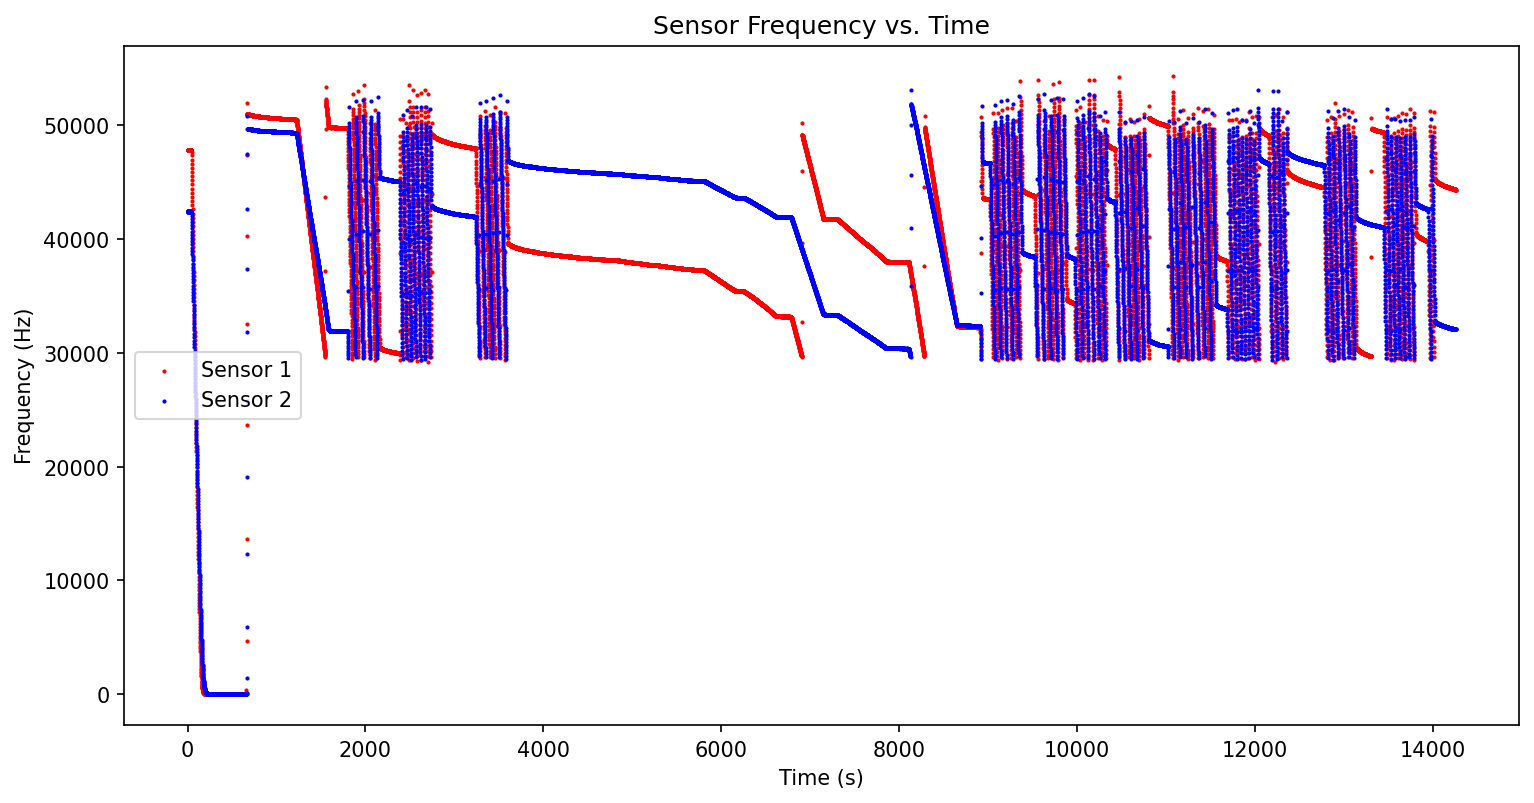

In [8]:

fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(t,eval_brd[:,8],s=1, c='r',label = 'Sensor 1')
plt.scatter(t,eval_brd[:,22],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0,600)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("Sensor Frequency vs. Time")
plt.show()

In [75]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 80
ul_1 = 100
zone_1 = eval_brd[(t> ll_1) & (t< ul_1)]
#zone_1[:,0]

ll_2 = 0.45e5
ul_2 = 0.62e5
#zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [76]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t_reg = t[(t> ll_1) & (t< ul_1)].reshape(-1, 1)
s_freq = zone_1[:,8].reshape(-1, 1)
model_s1.fit(t_reg,s_freq)
r_sq = model_s1.score(t_reg,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(1000*dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9973079522096892
intercept: [80000.63037775]
slope: [[-471.06059811]]
Sensor 1 sensitivity in kHz/Gy:  [[16.84284175]]


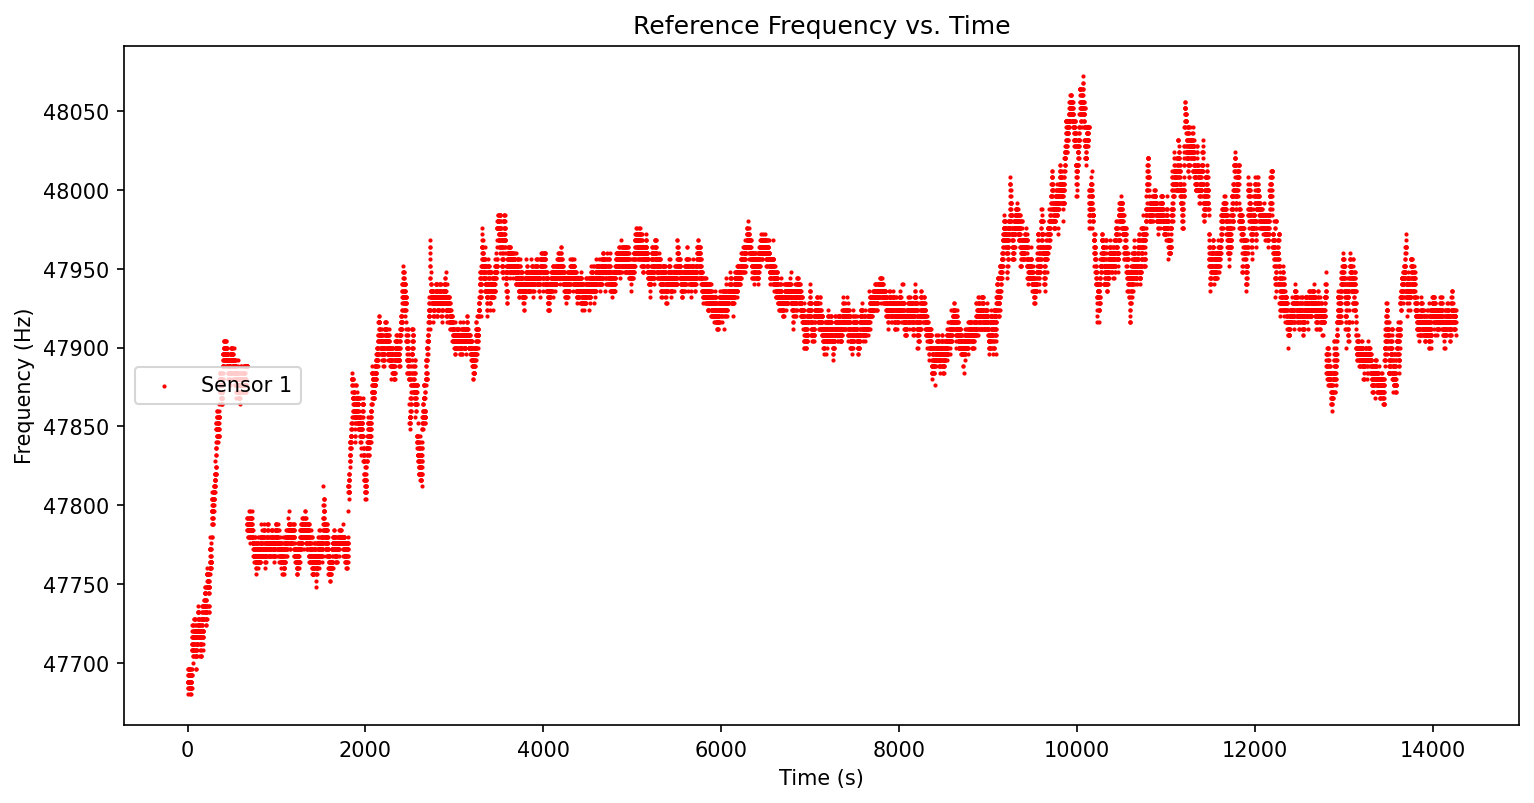

min:  47680
max:  48072
range:  392
mean:  47918.39656273588


In [9]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(t,eval_brd[:,9],s=1, c='r',label = 'Sensor 1')
#plt.scatter(t,eval_brd[:,23],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0,600)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("Reference Frequency vs. Time")
plt.show()
print('min: ',eval_brd[:,9].min())
print('max: ',eval_brd[:,9].max())
print('range: ',eval_brd[:,9].max()-eval_brd[:,9].min())
print('mean: ',eval_brd[:,9].mean())

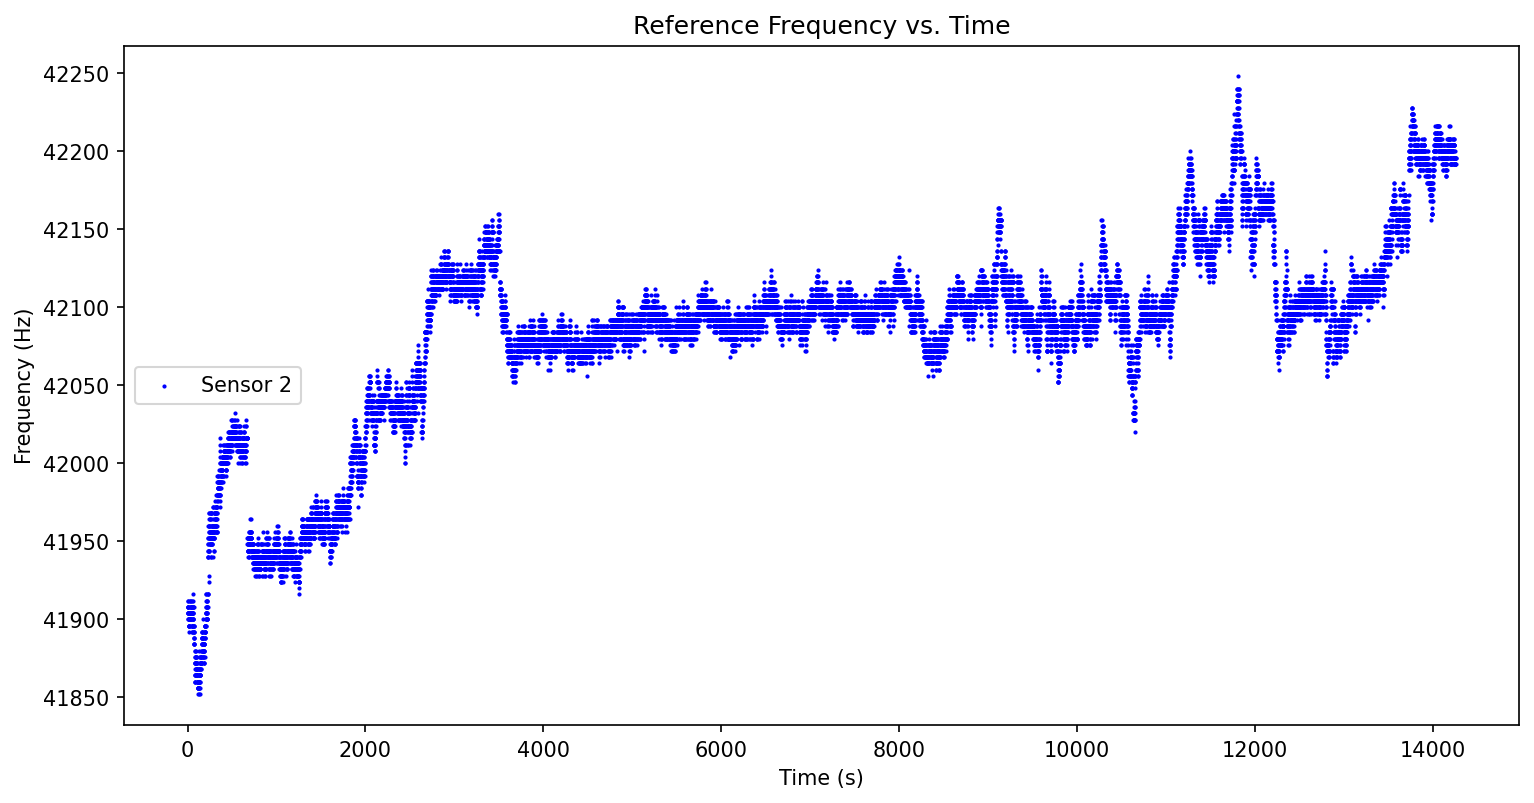

min:  41852
max:  42248
range:  396
mean:  42082.842478081635


In [10]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(t,eval_brd[:,23],s=1, c='b',label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0,600)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("Reference Frequency vs. Time")
plt.show()
print('min: ',eval_brd[:,23].min())
print('max: ',eval_brd[:,23].max())
print('range: ',eval_brd[:,23].max()-eval_brd[:,23].min())
print('mean: ',eval_brd[:,23].mean())

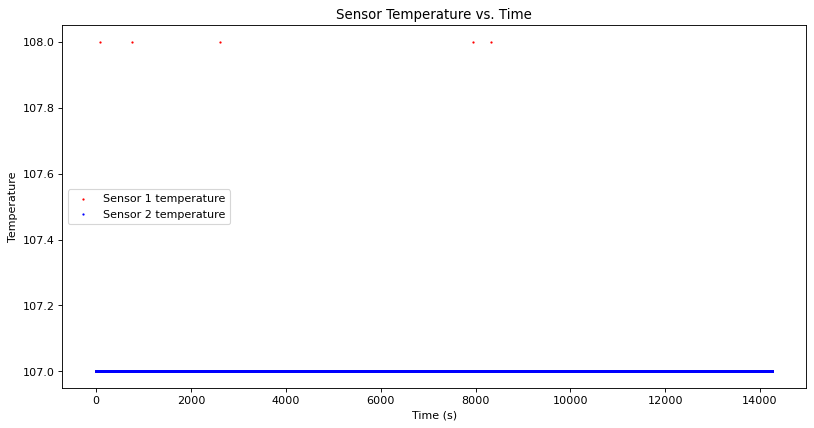

In [15]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(t, eval_brd[:,7],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(t, eval_brd[:,21],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("Sensor Temperature vs. Time")
plt.show()

In [13]:
eval_brd[:,21]

array([107, 107, 107, ..., 107, 107, 107], dtype=object)

In [28]:
#s1[(s1[:,0]> 3e5)]